In [1]:
import pandas as pd
import numpy as np

In [2]:
# read dataset
rating_df = pd.read_table('../data/raw/ml-100k/u.data', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])

rating_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# statistics about number of raitings
info = rating_df.groupby('user_id')['item_id'].nunique()
print('Number of rating from each user')
print('Max:', info.max())
print('Mean:', round(info.mean()))
print('Min', info.min())
print()

# statistics about number of raitings
info = rating_df.groupby('item_id')['user_id'].nunique()
print('Number of raitings for each film')
print('Max:', info.max())
print('Mean:', round(info.mean()))
print('Min', info.min())

Number of rating from each user
Max: 737
Mean: 106
Min 20

Number of raitings for each film
Max: 583
Mean: 59
Min 1


<Axes: title={'center': 'Number of each rating'}, xlabel='rating'>

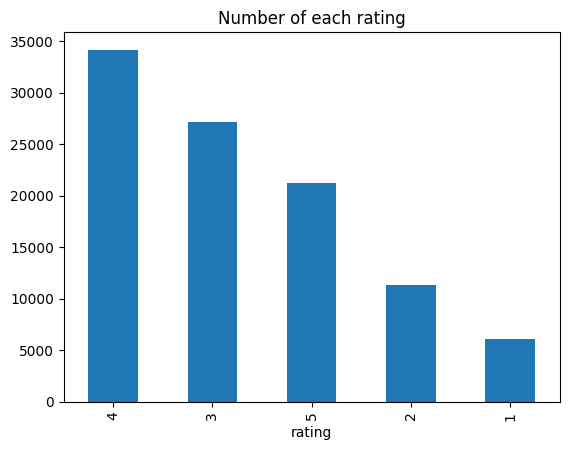

In [4]:
rating_df.rating.value_counts().plot(kind='bar', title='Number of each rating')

C:\Users\cutefluffyfox\AppData\Local\Temp\ipykernel_16076\2933527146.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  rating_df.month_year = rating_df.timestamp.apply(timestamp_to_month_year)


<Axes: title={'center': 'Number of ratings per month'}, xlabel='timestamp'>

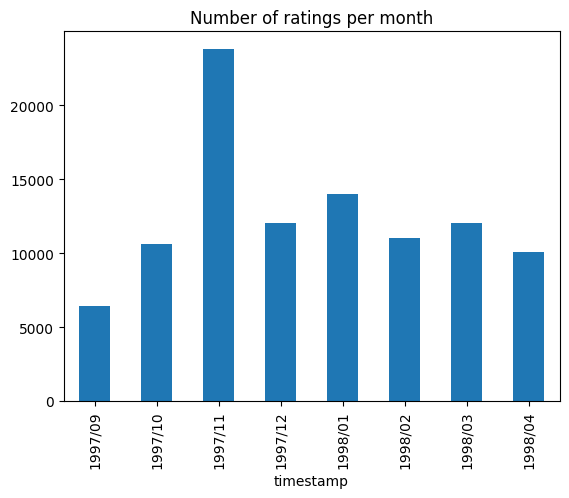

In [5]:
from datetime import datetime


def timestamp_to_month_year(timestamp: int):
    return datetime.fromtimestamp(timestamp).strftime('%Y/%m')


rating_df.month_year = rating_df.timestamp.apply(timestamp_to_month_year)
rating_df.month_year.value_counts().sort_index(axis=0).plot(kind='bar', title='Number of ratings per month')

In [6]:
# movies info
movies_df = pd.read_csv(
    '../data/raw/ml-100k/u.item', 
    header=None, 
    encoding='latin-1', 
    sep='|', 
    names=[
        'item_id', 'title', 'release_date', 'video_release_date', 'url', 
        'unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
        'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western'
    ],
    index_col=0
)

movies_df.head()

,title,release_date,video_release_date,url,unknown,action,adventure,animation,childrens,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
item_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0 251  75   3   9  32  23   0  46   4   0  13   4   9  25  54  84  21   8
  0  75 135   6  42  18   7   0  14  10   0   3   5   2  14  34  21   9   2
  0   3   6  42  33  10   0   0   0   2   0   1  17   0   2   4   3   1   0
  0   9  42  33 122  41   0   0  19  16   0   0  21   3   4   7   1   1   1
  0  32  18  10  41 505  16   1  89   7   0  14  22  11  97  13  14  13   7
  0  23   7   0   0  16 109   0  48   1  10   3   0  10   6   2  35   0   0
  0   0   0   0   0   1   0  50   3   0   0   0   0   0   0   0   0   1   0
  0  46  14   0  19  89  48   3 725   4   2   5  10  15  99   9  61  38   5
  0   4  10   2  16   7   1   0   4  22   0   0   0   0   2   6   1   0   0
  0   0   0   0   0   0  10   0   2   0  24   0   0   7   1   2  14   0   0
  0  13   3   1   0  14   3   0   5   0   0  92   0   2   2  12  19   0   0
  0   4   5  17  21  22   0   0  10   0   0   0  56   0  12   1   1   1   0
  0   9   2 

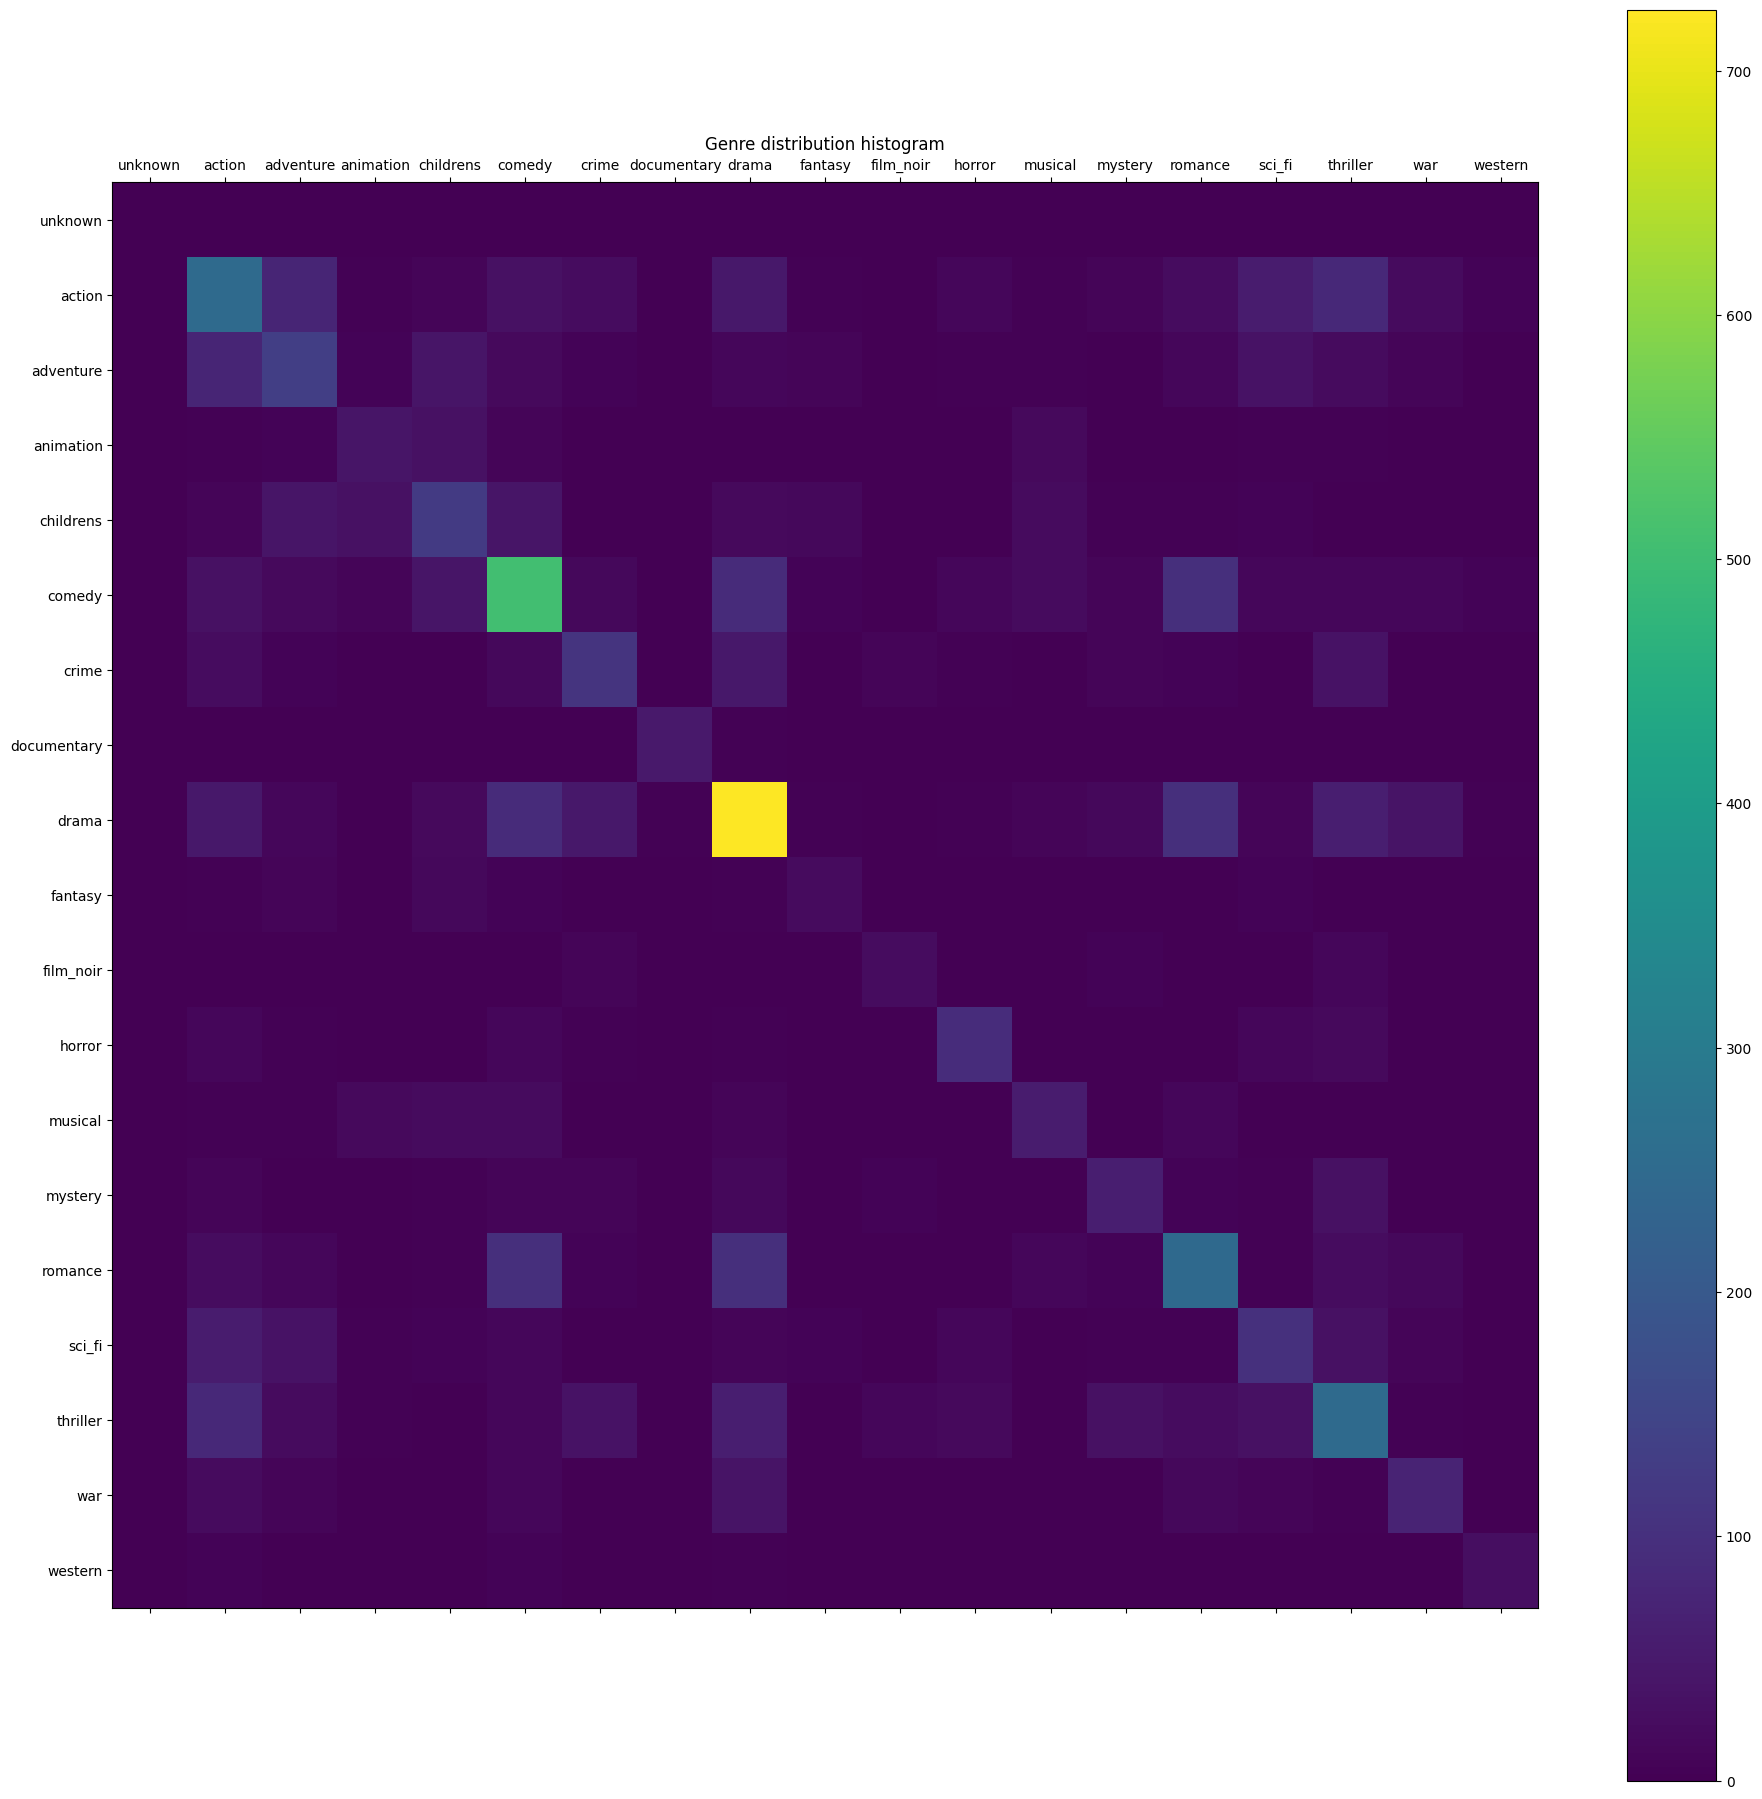

In [7]:
import matplotlib.pyplot as plt


# get genre distribution
one_hot_columns = ['unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy','film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western']
one_hot = movies_df[one_hot_columns]
one_hot = one_hot.to_numpy()


fig = plt.figure(figsize=(23, 23))
ax = fig.add_subplot()

cax = ax.matshow(one_hot.T @ one_hot)

fig.colorbar(cax)

xaxis = np.arange(len(one_hot_columns))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(one_hot_columns)
ax.set_yticklabels(one_hot_columns)
ax.set_title('Genre distribution histogram')

for line in (one_hot.T @ one_hot):
    print(*[str(elem).rjust(3, ' ') for elem in line])

In [8]:
users_df = pd.read_csv(
    '../data/raw/ml-100k/u.user', 
    header=None, 
    sep='|', 
    names=[
        'user_id', 'age', 'gender', 'occupation', 'zip_code'
    ],
    index_col=0
)

users_df.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


<Axes: title={'center': 'Age'}, ylabel='Frequency'>

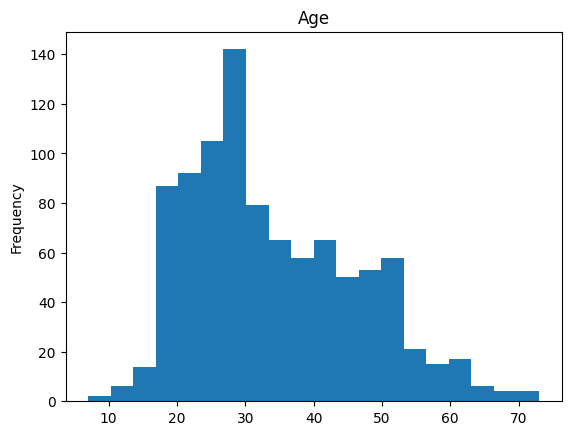

In [9]:
users_df.age.plot.hist(title='Age', bins=20)

<Axes: title={'center': 'Gender'}, xlabel='gender'>

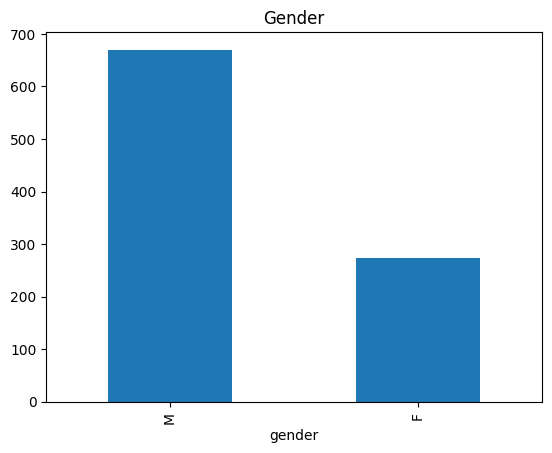

In [10]:
users_df.gender.value_counts().plot(kind='bar', title='Gender')

<Axes: title={'center': 'Occupation'}, xlabel='occupation'>

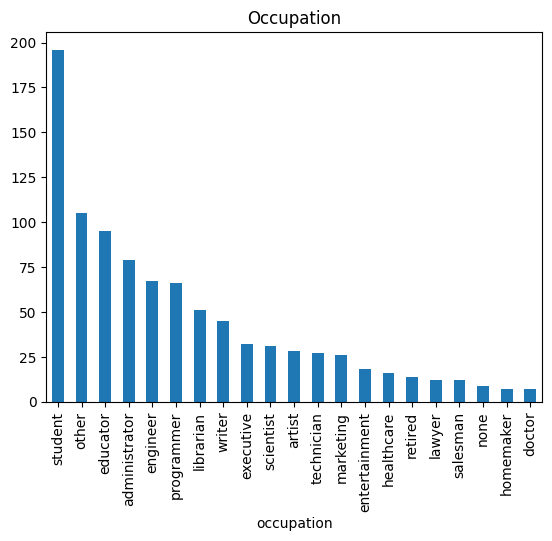

In [11]:
users_df.occupation.value_counts().plot(kind='bar', title='Occupation')

In [12]:
# zip-codes is almost unique
users_df.zip_code.value_counts().mean()

1.184673366834171

Text(0.5, 1.0, 'Number of ratings per film')

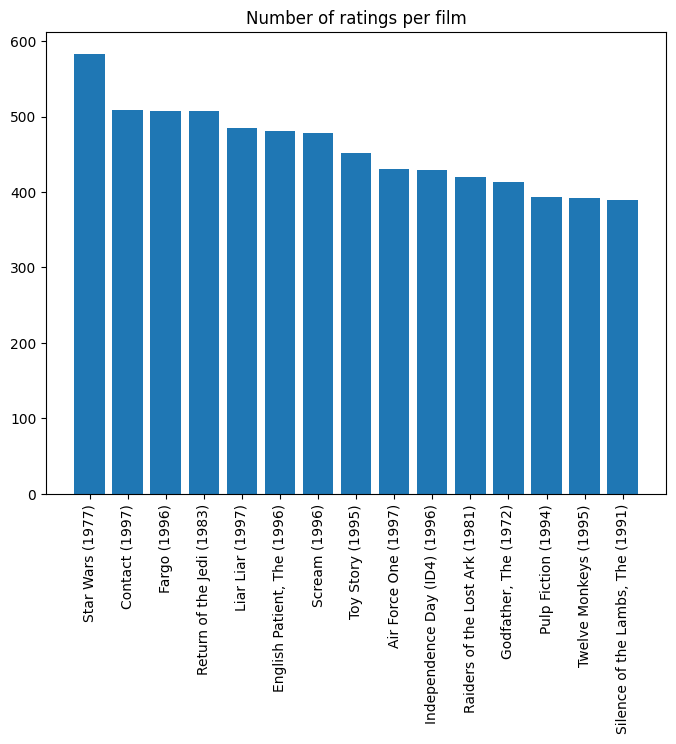

In [13]:
popular_films = []
for item_id, frequency in (rating_df.groupby('item_id')['user_id'].nunique().sort_values(ascending=False)[:15]).items():
    popular_films.append((movies_df.loc[item_id].title, frequency))

x, h = zip(*popular_films)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x, h)
plt.xticks(rotation=90)
ax.set_title('Number of ratings per film')